# Introduction
For those unacquainted, this is a jupyter notebook, a fairly popular and useful tool for interactive prototyping, data inspection, developing and documenting. Its content is partitioned into cells that can either contain markdown text or executable code, and further supports inline/in-cell vizualization of both plots and complex collections. 

The main purpose of this notebook is to provide a quick start for loading, processing and inspecting the data. Python-users  are free, and encouraged, to base their initial data exploration on this notebook, and everyone else are encouraged to take inspiration from the notebook when starting out in their language of choice. Particularly, the dataset placement and loading is important to get right in order to not check it into your own forked repositories. 

# Data placement and loading
We suggest that you clone/copy the dataset into your forked repositories.  
E.g., execute: <code>git clone git@github.com:sfi-norwai/2022_hackathon_hemsil2_dataset.git</code>  
when situated in the root directory of your forked repository, or use GitHub desktop etc. 

Ultimately, the provided *.gitignore* will ignore any directories named <code>2022_hackathon_hemsil2_dataset</code> within the repository, so as long as you name your data location accordingly, it can safely be placed within the forked repository. If you know what you are doing, you can always just keep the data outside of the repository or extend the gitignore to ignore other locations within it. 

In [16]:
from pathlib import Path

## Data path
**Note:** Modify the raw data path if you opt for not following the suggested placement

In [17]:
raw_data_path = '2022_hackathon_hemsil2_dataset'
data_dir = Path(raw_data_path)

## Load data
We use the python package pandas for loading the data

In [18]:
import pandas as pd
import numpy as np

In [19]:
data_path = data_dir / "hemsil2_datapoints_20102021.csv"
meta_data_path = data_dir / "ts_info.csv"

### Load data into pandas DataFrame

Load data points into DataFrame

In [20]:
data_df = pd.read_csv(data_path, sep=',', parse_dates=True, index_col=0)

Load column meta data into Python dictionaries that can be indexed by column names

In [21]:
meta_data_df = pd.read_csv(meta_data_path, sep=',', index_col=0)
meta_data_dict = {record['name']: record for record in meta_data_df.to_dict('records')}

## Identify missing data
Loading the data points into a pandas DataFrame seems to have worked fine, but closer inspection reveals that all columns contain "null-values"

In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105192 entries, 2010-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   flaevatn_ppt                 105171 non-null  float64
 1   hbv_hemsil2_inflow_pred_24h  105134 non-null  float64
 2   flaevatn_temp                105171 non-null  float64
 3   hbv_hemsil2_snow             105171 non-null  float64
 4   hemsil2_inflow_corr          105171 non-null  float64
 5   hbv_hemsil2_ground_water     105180 non-null  float64
 6   hbv_hemsil2_soil_water       105180 non-null  float64
 7   hbv_hemsil2_inflow_pred_48h  105108 non-null  float64
 8   hbv_hemsil2_total_water      104052 non-null  float64
 9   storeskar_inflow             105180 non-null  float64
 10  storeskar_temp               102576 non-null  float64
 11  hbv_hemsil2_snow_cover       104124 non-null  float64
dtypes: float64(12)
memory us

If we zoom in on some columns, we can notice some patterns in the missing data. E.g., flaevath_ppt, flaevatn_temp and other columns with 105171 non-null values are all NaN in most rows of the date 2021-09-14, while many of the remaining columns are consistenly NaN for the "skipped" hour when switching to daylight saving, e.g., storeskar_inflow. A few columns have a lot of missing values in the last months of the dataset

In [23]:
# Simple help function for extracting all rows where a given column has NaN values
def extract_null_df(df, column):
    return df[df[column].isnull()]

In [24]:
# Rerun cell with different column names to inspect rows where said column is null
column_name = 'storeskar_inflow'
null_rows = extract_null_df(data_df, column_name)
null_rows

,flaevatn_ppt,hbv_hemsil2_inflow_pred_24h,flaevatn_temp,hbv_hemsil2_snow,hemsil2_inflow_corr,hbv_hemsil2_ground_water,hbv_hemsil2_soil_water,hbv_hemsil2_inflow_pred_48h,hbv_hemsil2_total_water,storeskar_inflow,storeskar_temp,hbv_hemsil2_snow_cover
2010-10-31 01:00:00,0.0,10.24,0.90,15.01,11.18,16.35,40.95,10.08,47.13,NaN,3.70,100.00
2011-10-30 01:00:00,0.0,12.51,3.50,8.73,10.11,20.05,38.90,14.31,41.77,NaN,1.25,100.00
2012-10-28 01:00:00,0.0,4.23,-6.56,26.73,2.04,11.18,38.27,5.20,47.92,NaN,-11.51,100.00
2013-10-27 01:00:00,0.0,17.89,1.89,27.23,17.15,16.12,38.11,17.89,53.70,NaN,0.12,100.00
2014-10-26 01:00:00,0.0,39.39,4.27,21.21,39.79,32.79,38.65,29.68,55.22,NaN,5.28,98.73
2015-10-25 01:00:00,0.1,7.13,3.13,0.12,4.84,16.57,37.48,6.46,30.01,NaN,1.85,100.00
2016-10-30 01:00:00,0.0,6.15,-0.15,11.80,3.40,9.72,37.19,6.33,36.99,NaN,0.86,100.00
2017-10-29 01:00:00,0.0,14.65,-1.07,39.63,15.63,17.11,40.38,12.00,59.44,NaN,0.14,100.00
2018-10-28 01:00:00,0.0,5.36,-11.36,3.50,4.74,21.80,40.38,4.65,32.81,NaN,-12.04,100.00
2019-10-27 01:00:00,0.0,21.83,-6.35,12.58,21.78,24.24,38.04,19.69,44.13,NaN,-8.90,100.00


## Handling missing data
In real-world data, you have to expect some missing data. These may be caused by a myriad of issues like downtimes of sensors, communication and databases etc. There are multiple ways of handling such issues, each with their own sets of pros and cons. 

We provide an optional process for filling in all missing data points below

### [OPTIONAL] Simple removal of missing data
Given the observations above, a simple idea is to simply drop all data after a cut-off point beginning with the problematic date 2021-09-14, as this only makes out a couple of months out of 12 years of data. The remaining NaNs are exclusively caused by the switch to daylight saving and the entire timestamp does not really exist within the timezone. As long as the dataset does not provide absolute timestamps, the simplest course of action is likely to just fill in the NaNs using linear interpolation or back/front fill. **Note:** That the raw data likely has overwritten datapoints when switching from daylight saving in the autumn as well. All in all, these two abnormalities should not affect any models too much, and if you do not want to spend time on more advanced processing, it should be safe to use this.

Drop all data after 2021-09-13

In [25]:
data_df = data_df[data_df.index < pd.Timestamp(year=2021, month=9, day=1)]

In [26]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102264 entries, 2010-01-01 00:00:00 to 2021-08-31 23:00:00
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   flaevatn_ppt                 102264 non-null  float64
 1   hbv_hemsil2_inflow_pred_24h  102254 non-null  float64
 2   flaevatn_temp                102264 non-null  float64
 3   hbv_hemsil2_snow             102264 non-null  float64
 4   hemsil2_inflow_corr          102264 non-null  float64
 5   hbv_hemsil2_ground_water     102252 non-null  float64
 6   hbv_hemsil2_soil_water       102252 non-null  float64
 7   hbv_hemsil2_inflow_pred_48h  102252 non-null  float64
 8   hbv_hemsil2_total_water      102252 non-null  float64
 9   storeskar_inflow             102253 non-null  float64
 10  storeskar_temp               102264 non-null  float64
 11  hbv_hemsil2_snow_cover       102252 non-null  float64
dtypes: float64(12)
memory us

Fill NaNs caused by switching to daylight saving using linear interpolation

In [27]:
data_df = data_df.interpolate(method='linear')

In [28]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102264 entries, 2010-01-01 00:00:00 to 2021-08-31 23:00:00
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   flaevatn_ppt                 102264 non-null  float64
 1   hbv_hemsil2_inflow_pred_24h  102264 non-null  float64
 2   flaevatn_temp                102264 non-null  float64
 3   hbv_hemsil2_snow             102264 non-null  float64
 4   hemsil2_inflow_corr          102264 non-null  float64
 5   hbv_hemsil2_ground_water     102264 non-null  float64
 6   hbv_hemsil2_soil_water       102264 non-null  float64
 7   hbv_hemsil2_inflow_pred_48h  102264 non-null  float64
 8   hbv_hemsil2_total_water      102264 non-null  float64
 9   storeskar_inflow             102264 non-null  float64
 10  storeskar_temp               102264 non-null  float64
 11  hbv_hemsil2_snow_cover       102264 non-null  float64
dtypes: float64(12)
memory us

**Note:** A more intricate processing where only larger chunks of missing data are removed, while keeping track of the valid intervals is likely better. It would probably also be better to convert all times to UTC to avoid daylight saving issues, but you will then have to handle the overwritted hour in the autumn (interpolation etc)

# Look at metadata for the dataset

In [59]:
new_meta_data_df = meta_data_df[['name', 'unit']].copy()
display(new_meta_data_df)

,name,unit
0,flaevatn_ppt,mm
1,hbv_hemsil2_inflow_pred_24h,Q/h
2,flaevatn_temp,C
3,hbv_hemsil2_snow,mm
4,hemsil2_inflow_corr,Q/s
5,hbv_hemsil2_ground_water,mm
6,hbv_hemsil2_soil_water,mm
7,hbv_hemsil2_inflow_pred_48h,m3/s
8,hbv_hemsil2_total_water,Mm3
9,storeskar_inflow,Q/h


# Correlation analysis
We will look at some correlations lol

<AxesSubplot:>

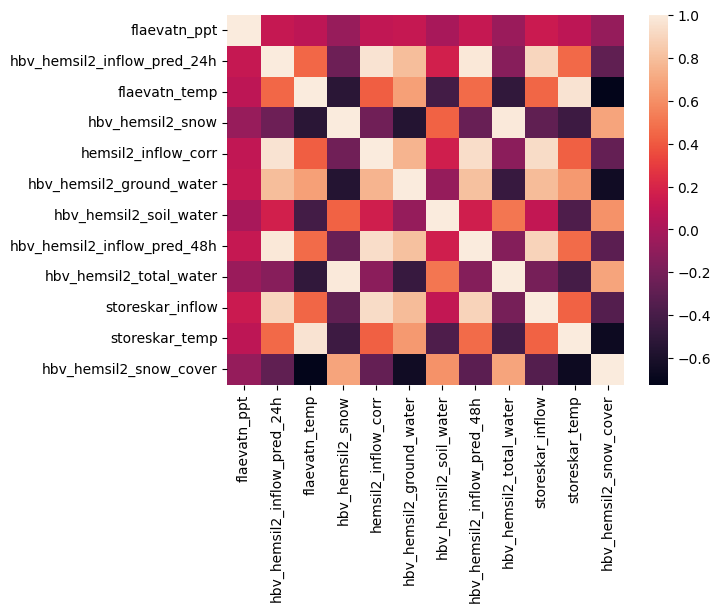

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = data_df.corr()
sns.heatmap(correlations)

## Promising correlations:
- Storeskar temp and Flævatn temp
- Hemsil2 total water and Hemsil 2 snow
- Storeskar inflow and hemsil2 prediction 24 hours
- 